# Getting started with Jupyter Notebooks

We extensively use [Jupyter Notebook](https://jupyter.org/) during the course, and we expect you to hand over your project as a notebook presentation. It is a powerful tool for **interactively developing and presenting new Machine Learning concepts and doing exercises**. Therefore, it is vital to get comfortable with the Jupyter Notebook. This chapter will walk you through some basics how to use Jupyter Notebooks.

> ✏️ For additional detail, you can visit the resources used for this tutorial: {cite}`jupyter_intro_1`, {cite}`jupyter_intro_2` and {cite}`vanderplas_2017`. We recommend reading {cite}`grupman_2021` and {cite}`pryke_2021` for more advanced topics.

## Setup

Jupyter’s Notebooks is a web app. Jupyter starts up a local Python server to serve the app to your web browser, making it essentially platform-independent and opening the door to easier sharing on the web.

### Installation

The Jupyter Notebook is not included with Python, so if you want to try it out, you will need to install Jupyter and have a working Python environment. We have already installed one environment that includes Jupyter in [the previous section](environment-setup.md).

If your environment does not include Jupyter, you can install it by running the following command in your conda environment:

```console
conda install notebook
```

### Starting Server

With Jupyter installed, let's start the Notebook server by opening your terminal application in the home folder of the project repository and running the following command:

```console
jupyter notebook
```

This will start up Jupyter, and your default browser should start (or open a new tab) to the following URL: [http://localhost:8888/tree](http://localhost:8888/tree). The opened page should look like this:

![Jupyter Notebook web app](../static/images/initial_notebook_screen.png "Jupyter Notebook web app")

> ✏️ Alternatively, you can use an [IDE](ide-overview.md) to interact with the server

## Running your first notebook

Let's familiarize ourselves a bit with the Jupyter Notebook web app and its interface.

### Creating a Notebook

Browse to the folder in which you would like to create your first notebook, click the "New" drop-down button in the top-right and select "Python 3":

![The new Notebook menu](../static/images/new_notebook_menu.webp "The new Notebook menu")

This should create a new notebook in the selected folder similar to this:

![A new Notebook](../static/images/new_notebook.png "A new Notebook")

You might notice the word _Untitled_ at the top of the page. It is the title of the page and the name of your notebook. As a good practice, change the name to something more descriptive. We use [Snake case](https://en.wikipedia.org/wiki/Snake_case) for variable names, function names, method names, and module or package (i.e., file) names. Move your mouse over the word _Untitled_ and click on the text. You should now see an in-browser dialog titled _Rename Notebook_, so do.

> ✏️ Each time you create a new notebook, a new _.ipynb_ file will be created. Each _.ipynb_ file is a text file that describes your notebook's contents in a _JSON_ format.

### Executing cells

A Notebook’s cell defaults to using code whenever you create one, and that cell uses the kernel you chose when you started your Notebook.

Thus, to verify that everything is working as it should, you can add some Python code to the cell and try running its contents. For example, try the following code that will **plot some data**:

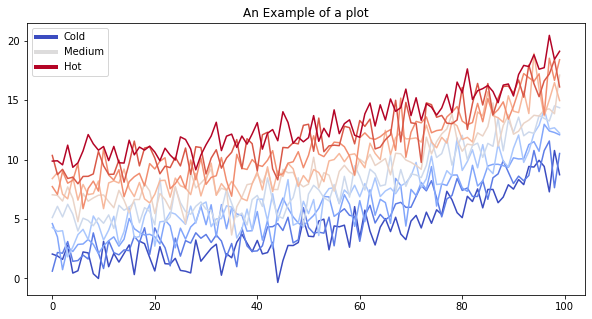

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams, cycler
from matplotlib.lines import Line2D

# fixing random state for reproducibility
np.random.seed(19680801)

# generate data
N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))
custom_lines = [
    Line2D([0], [0], color=cmap(0.), lw=4),
    Line2D([0], [0], color=cmap(.5), lw=4),
    Line2D([0], [0], color=cmap(1.), lw=4)
]

# create an instance of the plot
_, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot'])
ax.set_title('An Example of a plot');

### Help and Documentation

The Python language is built with the user in mind. Every Python object references a string, known as a _doc string_, which in most cases includes a concise summary of the object and how to use it. Python has a built-in `help()` function to access this information and print the results. For example, to see the documentation of the built-in `sum` function, you can do the following:

In [2]:
help(sum)

Help on built-in function sum in module builtins:

sum(iterable, /, start=0)
    Return the sum of a 'start' value (default: 0) plus an iterable of numbers
    
    When the iterable is empty, return the start value.
    This function is intended specifically for use with numeric values and may
    reject non-numeric types.



Jupyter also introduces the `?` character as a shorthand for accessing this documentation and other relevant information:

In [3]:
L = [1, 2, 3]
L?

### Adding Rich Content (Markdown)

There are additional types of cells to code. Jupyter Notebook supports adding rich content to its cells as well. To do so, we will use [Markdown](https://www.markdownguide.org/). It is a lightweight, easy-to-learn markup language for formatting plain text. Its syntax has a one-to-one correspondence with HTML tags.

> ✏️ We also use Markdown to prepare materials for the course.

There is an overview of some basics to get you started:

~~~markdown
# This is a level 1 heading

## This is a level 2 heading

This is some plain text that forms a paragraph. Add emphasis via **bold** and __bold__, or *italic* and _italic_.

Paragraphs must be separated by an empty line.

* Sometimes we want to include lists.
* Which can be bulleted using asterisks.

1. Lists can also be numbered.
2. If we want an ordered list.

[It is possible to include hyperlinks](https://www.example.com)

Inline code uses single backticks: `foo()`, and code blocks use triple backticks:

```
bar()
```

Or can be indented by 4 spaces:

    foo()

And finally, adding images is easy: ![Alt text](https://www.example.com/image.jpg)
~~~

### Line Magics

Jupyter adds on top of the standard Python syntax. Those enhancements are known as _magic commands_. Magic commands come in two flavors: _line magics_, which are denoted by a single `%` prefix and operate on a single line of input, and _cell magics_, which are represented by a double `%%` prefix and work on multiple lines of input.

Let's use `%timeit` to get a sense of the time it takes to execute `[1] * 100`:

In [4]:
%timeit [1] * 100

384 ns ± 2.21 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


To learn what _magic commands_ are available in your environment, use `%lsmagic`.

### Errors and Debugging

Development always requires a bit of trial and error. When a Python script fails, it will often raise an Exception. The information about the cause of the error can be found in the _traceback_. Luckily enough, Jupyter prints the cause of the exception:

In [5]:
# create a method that rises an Exception
def func1(a):
    return a / 0

# run the function
func1(2)

ZeroDivisionError: division by zero